In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
df = pd.read_csv(r"C:\Users\PC\Desktop\Springboard Data Science Career Track\Github Springboard Repository\Springboard\DataScience Capstone 2\lichess_dataframe_all.csv")


In [3]:
df = df[['Event', 'White Elo', 'Black Elo', 'Result', 'Termination', 'Time Control', 'Opening',"Game URL"]]


In [4]:
df.head()

,Event,White Elo,Black Elo,Result,Termination,Time Control,Opening,Game URL
0,Rated Bullet game,1923,1910,1/2-1/2,Time forfeit,60+0,Modern Defense,https://lichess.org/aAcMUViA
1,Rated Bullet game,1781,1782,0-1,Time forfeit,60+0,Scandinavian Defense: Main Line,https://lichess.org/brBOPdLj
2,Rated Bullet game,2528,2355,1-0,Normal,60+0,Hungarian Opening: Slav Formation,https://lichess.org/pk0m4lj8
3,Rated Bullet game,2010,1996,1-0,Time forfeit,60+0,Rat Defense: Antal Defense,https://lichess.org/ZXitDcRa
4,Rated Bullet game,1805,1831,0-1,Time forfeit,60+0,Four Knights Game: Scotch Variation Accepted,https://lichess.org/j50FcHUm


While definitions will be provided later on as we explore each column, 
Let's define all of the columns up front.
Event: Related to time control, Event is the type of chess game. 
White Elo/Black Elo: This is player ratings. 
Result: Who won. 1-0 is White. 0-1 is Black. 1/2-1/2 is a draw. 
Termination: How the game finished. Did a player resign or were they checkmated. 
Time Control: Speaks for itself. Is in seconds and the number following the "+" is the increment if any.
Opening: Name of the opening players played. It is generally defined by the first few moves and it is dependent on both players' moves. 
Game URL: Unique identifier for each game. Able to go to see them online.


In [5]:
df.shape

(92670440, 8)

In [6]:
#number of missing values by column
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=["count", "%"]
missing.sort_values(by=["count"], ascending=False)

,count,%
Event,0,0.0
White Elo,0,0.0
Black Elo,0,0.0
Result,0,0.0
Termination,0,0.0
Time Control,0,0.0
Opening,0,0.0
Game URL,0,0.0


In [7]:
# Taking a look at different event types. We may choose to get rid of some. 

df.Event.unique()

array(['Rated Bullet game', 'Rated Blitz game', 'Rated Rapid game', ...,
       'Rated Rapid tournament https://lichess.org/tournament/3vjTqTQZ',
       'Rated Blitz tournament https://lichess.org/tournament/hauGbCp1',
       'Rated Blitz tournament https://lichess.org/tournament/9rdFoCwd'],
      dtype=object)

In [8]:
# As seen above, we need to remove the hyperlink from the above events. The hyperlinks appear to be special events (like tournaments as opposed to the general pool). 

import numpy as np
import re # We import Python's Regular Expressions library

In [9]:
df['Event'] = df['Event'].apply(lambda x: re.split(' https:\/\/.*', str(x))[0])

# Source: https://stackoverflow.com/questions/51994254/removing-url-from-a-column-in-pandas-dataframe


In [10]:
df.Event.unique()


array(['Rated Bullet game', 'Rated Blitz game', 'Rated Rapid game',
       'Rated Correspondence game', 'Rated UltraBullet game',
       'Rated Blitz tournament', 'Rated Bullet tournament',
       'Rated Classical game', 'Rated Rapid tournament',
       'Rated Classical tournament', 'Rated UltraBullet tournament'],
      dtype=object)

In [11]:
# looking at how many of each event there are.

df.Event.value_counts()


Rated Blitz game                40055628
Rated Bullet game               30273072
Rated Rapid game                11958331
Rated Blitz tournament           4442352
Rated Bullet tournament          3037172
Rated Rapid tournament            989984
Rated Classical game              619936
Rated UltraBullet game            557872
Rated UltraBullet tournament      509807
Rated Correspondence game         203343
Rated Classical tournament         22943
Name: Event, dtype: int64

Text(0.5, 0, 'Count')

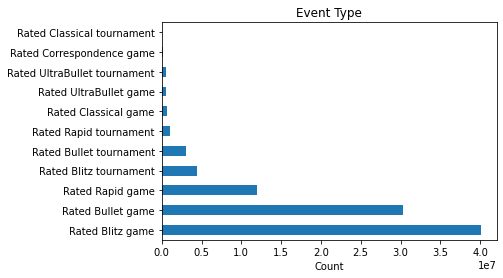

In [12]:
# Visual for the above information. 

fig, ax = plt.subplots()
df.Event.value_counts().plot(kind="barh")
ax.set_title("Event Type")
ax.set_xlabel("Count")


In [13]:
df_Blitz = df.loc[df['Event'].isin(["Rated Blitz tournament"]) | df['Event'].isin(["Rated Blitz game"])] 

In [14]:
df_Blitz.head(-20)

,Event,White Elo,Black Elo,Result,Termination,Time Control,Opening,Game URL
13,Rated Blitz game,1429,1460,1-0,Normal,300+3,Sicilian Defense: Bowdler Attack,https://lichess.org/bVgQVZ7L
14,Rated Blitz game,1687,1647,1-0,Time forfeit,300+3,King's Pawn Game: Leonardis Variation,https://lichess.org/2ORvpVTt
15,Rated Blitz game,1778,1837,1-0,Normal,300+3,Queen's Gambit Declined: Neo-Orthodox Variatio...,https://lichess.org/rNNyi2Xh
16,Rated Blitz game,1101,1086,0-1,Normal,300+3,Queen's Gambit Declined: Marshall Defense,https://lichess.org/cLhZKY8t
17,Rated Blitz game,1362,1408,0-1,Normal,300+3,Sicilian Defense: Smith-Morra Gambit,https://lichess.org/aVEa6ISS
...,...,...,...,...,...,...,...,...
92670391,Rated Blitz game,1921,1880,1-0,Normal,180+2,Italian Game: Two Knights Defense,https://lichess.org/551QszBW
92670395,Rated Blitz game,2043,2072,1/2-1/2,Normal,180+0,"Caro-Kann Defense: Panov Attack, Modern Defense",https://lichess.org/JcVTknmL
92670396,Rated Blitz game,1726,1743,0-1,Normal,300+0,Queen's Gambit Declined: Chigorin Defense,https://lichess.org/AHApTIJR
92670397,Rated Blitz game,1384,1282,1-0,Normal,300+0,"Sicilian Defense: Closed, Traditional",https://lichess.org/2ey2bcZf


In [15]:
df_Blitz['Event'].value_counts()

Rated Blitz game          40055628
Rated Blitz tournament     4442352
Name: Event, dtype: int64

Something to know, and that the data won't share, is that each event type has a different elo. 
The elo shown is for that specific Event. After talking with my mentor, we concluded that it is best to look at just one rating band for now and maybe expand the project later on. From now on, we will only be looking at Blitz games as they are the most popular. 


In [16]:
df_Blitz['White Elo'].max()

3526

In [17]:
df_Blitz["White Elo"].min()

600

In [18]:
df_Blitz["White Elo"].nunique()

2506

In [19]:
df_Blitz["Black Elo"].max()

3553

In [20]:
df_Blitz["Black Elo"].min()

600

In [21]:
df_Blitz["Black Elo"].nunique()

2505

In [22]:
df_Blitz.Result.unique()

array(['1-0', '0-1', '1/2-1/2', '*'], dtype=object)

In [23]:
df_Blitz['Result'].value_counts()

1-0        22048925
0-1        20486017
1/2-1/2     1901832
*             61206
Name: Result, dtype: int64

In [24]:
'''
"1-0" means white won
"0-1" means black won
"1/2-1/2" means there was a draw
not sure what "*" means. Will have to explore and see if we keep the data. 
'''

result_star = df_Blitz.loc[df['Result'] == '*']
result_star.head(-20)

# My suspicions are that this value ("*") is present when the termination was either unterminated or a game was abandoned. 
# Unterminated means that the game has not finished this month.
# Abandoned means that the game was either canceled due to website timeout (usually because of maintanance) or either player did not move their first move. 
# We will explore this a little further and most likely remove this data. 


,Event,White Elo,Black Elo,Result,Termination,Time Control,Opening,Game URL
2578354,Rated Blitz tournament,1663,2182,*,Abandoned,300+0,Horwitz Defense,https://lichess.org/r3Hi5GPv
3316173,Rated Blitz game,978,960,*,Abandoned,300+0,Queen's Pawn Game: Mason Variation,https://lichess.org/3K2mvl9X
3383496,Rated Blitz game,1577,1606,*,Abandoned,300+0,Owen Defense,https://lichess.org/z1HmXlnd
3384403,Rated Blitz game,1715,1776,*,Abandoned,180+2,Scandinavian Defense,https://lichess.org/dts8SV4O
3384663,Rated Blitz game,1140,1186,*,Abandoned,300+0,King's Pawn Game: Wayward Queen Attack,https://lichess.org/pBT7IlrH
...,...,...,...,...,...,...,...,...
92669586,Rated Blitz game,1509,1483,*,Abandoned,180+0,King's Pawn,https://lichess.org/jOyoiazp
92669599,Rated Blitz game,1206,1127,*,Abandoned,300+0,Van't Kruijs Opening,https://lichess.org/CBUxXrnU
92669768,Rated Blitz game,1327,1315,*,Abandoned,300+0,?,https://lichess.org/q00xfpRz
92669803,Rated Blitz game,2263,1982,*,Abandoned,180+0,?,https://lichess.org/a8iKh4gK


In [25]:
result_star["Termination"].value_counts()


Abandoned       61148
Unterminated       58
Name: Termination, dtype: int64

In [26]:
df["Termination"].value_counts()


Normal              61739431
Time forfeit        30534121
Abandoned             356864
Unterminated           36351
Rules infraction        3673
Name: Termination, dtype: int64

In [27]:
# It appears that all unterminated games had a "*" as their Result. We will be deleting them. 
# As for Abondoned, we will also be deleting the ones present in the "*" group but most likely keeping the ones with results. 
# We will be deleting all results with "*"
# Sometimes online chess players will simply stop playing after they start losing or they were disconnected due to unforeseen events. Either way, a result is present and that data could potentially be relevant in the future. 
# Rules infraction means that someone was caught cheating. 


In [28]:
# removing results with "*"
df2 = df_Blitz[df_Blitz.Result != '*']

In [29]:
# We now have all decisive results

df2['Result'].value_counts()

1-0        22048925
0-1        20486017
1/2-1/2     1901832
Name: Result, dtype: int64

In [30]:
df2["Termination"].value_counts()


Normal              33583414
Time forfeit        10725694
Abandoned             126563
Rules infraction        1103
Name: Termination, dtype: int64

In [31]:
# Next, I would like to make sure there are no duplicate games, so I will check to see if there are any repeating game URLS. 
boolean = df['Game URL'].duplicated().any() 


In [32]:
print(boolean)

False


In [33]:
# There are no duplicate Game URLS

In [34]:
df2["Time Control"].value_counts()

180+0    18162605
300+0    13485324
180+2     7420359
300+3     4698366
300+2       96038
           ...   
90+9           44
30+7           29
30+6           27
30+8           19
15+9            6
Name: Time Control, Length: 75, dtype: int64

There are 75 different time controls under Blitz. Some seem too short to be listed under blitz according to https://lichess.org/faq#time-controls. We will explore that. Here are the definitions of events according to Lichess:

    Lichess time controls are based on estimated game duration = (clock initial time) + 40 × (clock increment)
    For instance, the estimated duration of a 5+3 game is 5 × 60 + 40 × 3 = 420 seconds.

    < 29s = UltraBullet
    < 179s = Bullet
    < 479s = Blitz
    < 1499s = Rapid
    ≥ 1500s = Classical

In [35]:
df_Blitz_too_short = df2.loc[df['Time Control'].isin(["15+9", "120+4"])] 

In [36]:
df_Blitz_too_short

,Event,White Elo,Black Elo,Result,Termination,Time Control,Opening,Game URL
341116,Rated Blitz game,1647,1680,0-1,Time forfeit,120+4,Queen's Gambit Accepted,https://lichess.org/m4qaqeuZ
436878,Rated Blitz game,1681,1617,1-0,Normal,120+4,King's Pawn Game: Leonardis Variation,https://lichess.org/K013mozG
579111,Rated Blitz game,1307,1076,0-1,Normal,120+4,Sicilian Defense,https://lichess.org/s26fmNr1
593291,Rated Blitz game,1299,1570,0-1,Normal,120+4,Sicilian Defense: Bowdler Attack,https://lichess.org/li23UMeQ
749744,Rated Blitz tournament,993,1842,0-1,Normal,120+4,King's Indian Attack: Symmetrical Defense,https://lichess.org/tnEvaE5S
...,...,...,...,...,...,...,...,...
92476644,Rated Blitz game,1349,1122,1-0,Normal,120+4,Queen's Gambit Accepted: Rosenthal Variation,https://lichess.org/U0VLk9V6
92488120,Rated Blitz game,1119,934,1-0,Normal,120+4,French Defense: Steinitz Attack,https://lichess.org/5j6BzXyf
92592000,Rated Blitz game,1675,1251,1-0,Normal,120+4,Hungarian Opening,https://lichess.org/8duTwBi1
92649340,Rated Blitz game,1446,1469,1-0,Normal,120+4,"Italian Game: Two Knights Defense, Modern Bish...",https://lichess.org/XdTVEPk5


After exploring the data, it turns out that the data is not perfect and some games are being classified as blitz when they shouldn't be. We will remove those according to Lichess's definition of blitz.

In [37]:
df2['Time Control'].unique()


array(['300+3', '300+0', '180+0', '180+2', '300+1', '300+2', '180+3',
       '240+0', '60+5', '120+3', '300+4', '360+0', '180+1', '120+5',
       '420+0', '120+2', '240+2', '240+1', '60+10', '60+3', '240+3',
       '360+1', '0+8', '180+4', '0+11', '420+1', '30+4', '15+10', '240+5',
       '180+5', '360+2', '60+9', '240+4', '30+11', '90+3', '0+5', '30+7',
       '180+7', '15+11', '120+8', '15+5', '60+4', '90+5', '120+6', '0+6',
       '120+7', '45+5', '0+7', '0+10', '15+7', '30+10', '120+4', '15+6',
       '90+9', '180+6', '45+6', '60+7', '60+6', '30+5', '60+8', '45+10',
       '90+6', '45+4', '90+4', '0+9', '90+8', '90+7', '30+9', '15+9',
       '30+6', '15+8', '45+8', '45+9', '30+8', '45+7'], dtype=object)

In [38]:
# We will manually select which time controls to keep. 
df3 = df2.loc[df['Time Control'].isin(['300+3', '300+0', '180+0', '180+2', '300+1', '300+2', '180+3',
       '240+0', '300+4', '360+0', '180+1', '420+0', '240+2', '240+1', '240+3',
       '360+1', '180+4', '420+1', '240+5', '180+5', '360+2', '240+4', 
       '180+7', '120+8', '120+6', '120+7', '120+4', '180+6'])] 

In [39]:
# we removed roughly 100k games that did not fit our definition. 
df3.shape

(44332657, 8)

In [40]:
df3.head()

,Event,White Elo,Black Elo,Result,Termination,Time Control,Opening,Game URL
13,Rated Blitz game,1429,1460,1-0,Normal,300+3,Sicilian Defense: Bowdler Attack,https://lichess.org/bVgQVZ7L
14,Rated Blitz game,1687,1647,1-0,Time forfeit,300+3,King's Pawn Game: Leonardis Variation,https://lichess.org/2ORvpVTt
15,Rated Blitz game,1778,1837,1-0,Normal,300+3,Queen's Gambit Declined: Neo-Orthodox Variatio...,https://lichess.org/rNNyi2Xh
16,Rated Blitz game,1101,1086,0-1,Normal,300+3,Queen's Gambit Declined: Marshall Defense,https://lichess.org/cLhZKY8t
17,Rated Blitz game,1362,1408,0-1,Normal,300+3,Sicilian Defense: Smith-Morra Gambit,https://lichess.org/aVEa6ISS


In [41]:
df3.to_csv(r'C:\Users\PC\Desktop\Springboard Data Science Career Track\Github Springboard Repository\Springboard\DataScience Capstone 2\lichess_dataframe_Data_Definition.csv')